### 사용자 기반 협업 필터링 추천 시스템 예제

**사용 Data**

In [31]:
import pandas as pd
# 최소 평점 1, 0은 보지않은 영화
user1 = [5,4,4,3,0]
user2 = [2,1,2,0,4]
user3 = [4,4,0,5,3]
user4 = [0,2,1,4,3]
user5 = [4,0,4,4,2]
user6 = [4,2,3,5,1]

cols = ['기적','인질','싱크홀','서유기','발신제한']

movie_df = pd.DataFrame([user1,user2,user3,user4,user5,user6],columns=cols,index=['u1','u2','u3','u4','u5','u6'])
movie_df


,기적,인질,싱크홀,서유기,발신제한
u1,5,4,4,3,0
u2,2,1,2,0,4
u3,4,4,0,5,3
u4,0,2,1,4,3
u5,4,0,4,4,2
u6,4,2,3,5,1


### 사용자 기반 협업 알고리즘
- **개별 사용자의 영화 평점을 이용해 안 본 영화의 평점 예측**

- 사용자 기반의 협업 필터링에서의 유사도는 두 사용자가 얼마나 유사한 항목(아이템)을 선호했는지를 기준으로 함
- 한 사용자가 평가한 영화들의 점수들을 벡터로 나타내면 
    - 위 df에서는 u1의 평가 점수는 <5, 4, 4, 3, ->로 
    - u2의 평가 점수는 <2,1,2,-,4> 로 나타남
    
- 이 때 두 사용자 간의 유사도는 두 벡터 간의 유사도로 정의
- 두 벡터 간의 유사도를 구하기 위해서 코사인 유사도 사용(컨텐츠기반 추천 알고리즘에서 설명함)

**각 사용자 간의 유사도 구하기**

In [32]:
user_mat = movie_df.values
user_mat

array([[5, 4, 4, 3, 0],
       [2, 1, 2, 0, 4],
       [4, 4, 0, 5, 3],
       [0, 2, 1, 4, 3],
       [4, 0, 4, 4, 2],
       [4, 2, 3, 5, 1]], dtype=int64)

In [33]:
# 사이킷런의 cosine_similarity() 함수를 이용해 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
user_sim = cosine_similarity(user_mat, user_mat)
user_sim

array([[1.        , 0.54160256, 0.77272727, 0.53935989, 0.81934649,
        0.91287093],
       [0.54160256, 1.        , 0.59083916, 0.58423739, 0.66564024,
        0.53935989],
       [0.77272727, 0.59083916, 1.        , 0.83151316, 0.71692818,
        0.86307797],
       [0.53935989, 0.58423739, 0.83151316, 1.        , 0.65828059,
        0.73854895],
       [0.81934649, 0.66564024, 0.71692818, 0.65828059, 1.        ,
        0.93494699],
       [0.91287093, 0.53935989, 0.86307797, 0.73854895, 0.93494699,
        1.        ]])

In [34]:
col = movie_df.index
pd.DataFrame(user_sim, columns=col, index=col)

,u1,u2,u3,u4,u5,u6
u1,1.000000,0.541603,0.772727,0.539360,0.819346,0.912871
u2,0.541603,1.000000,0.590839,0.584237,0.665640,0.539360
u3,0.772727,0.590839,1.000000,0.831513,0.716928,0.863078
u4,0.539360,0.584237,0.831513,1.000000,0.658281,0.738549
u5,0.819346,0.665640,0.716928,0.658281,1.000000,0.934947
u6,0.912871,0.539360,0.863078,0.738549,0.934947,1.000000


In [35]:
movie_df

,기적,인질,싱크홀,서유기,발신제한
u1,5,4,4,3,0
u2,2,1,2,0,4
u3,4,4,0,5,3
u4,0,2,1,4,3
u5,4,0,4,4,2
u6,4,2,3,5,1


### 최근접 이웃 기법을 사용
- 최근접 이웃의 수를 N이라고 하고 
- 해당 유저와 i번째 최근접 이웃과의 유사도를 sim_i, 
- 그 이웃이 준 평점을 R_i라고 할 때, 
- 한 유저의 해당 영화에 대한 예상 평점 R_predict은 다음의 식으로 표현가능
- **평점들을 단순히 가중 평균한 것**
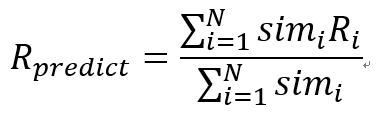

- u2 유저가 아직 보지 않은 영화 서유기에 대한 u2의 평점예측(다른 사용자와의 유사도와 다른 사용자가 서유기에 준 평점을 가중치로 사용)

In [36]:
(0.54*3 + 0.59*5 + 0.58*4 + 0.66*4 + 0.63*5)/(0.54+0.59+0.58+0.66+0.63)

4.2266666666666675

## 아이템 기반 협업 필터링 추천

일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 높음  
이유 : 비슷한 영화(또는 상품)를 좋아(또는 구입)한다고 해서  
- 사람들의 취향이 비슷하다고 판단하기는 어려운 경우가 많기 때문
- 매우 유명한 영화는 취향과 관계없이 대부분의 사람이 관람하는 경우가 많고
- 사용자들이 평점을 매긴 영화(또는 상품)의 개수가 많지 않은 경우가 일반적인데
- 이를 기반으로 다른 사람과의 유사도를 비교하기 어려운 부분도 있음
- 따라서 최근접 이웃 협업 필터링은 대부분 아이템 기반의 알고리즘 적용

아이템 기반 협업 필터링 구현 순서  
(1) 사용자-아이템 행렬 데이터를 아이템-사용자 행렬 데이터로 변환  
(2) 아이템간의 코사인 유사도로 아이템 유사도 산출  
(3) 사용자가 관람(구매)하지 않은 아이템들 중에서 아이템간 유사도를 반영한 예측 점수 계산  
(4) 예측 점수가 가장 높은 순으로 아이템 추천  

### 아이템 기반 최근접 이웃 협업 필터링 추천 시스템 예제

사용 데이터
- Grohplens 사이트의 MovieLens 데이터 셋 사용
- https://grouplens.org/datasets/movielens/latest  
- ml-latest-small.zip  
- ratings.csv, movies.csv 사용  
- 600명의 사용자 9,000 개의 영화에 대해 평가한
- 십만개의 평점(rating) 정보 포함  
- 파일 열어서 확인 
- ratings : userId, movieId, rating
- movies : movieId, title, genres 

**데이터 가공 및 행렬 변환**

In [37]:
# 데이터 
import pandas as pd
import numpy as np

movies = pd.read_csv('./data/movies.csv')
ratings = pd.read_csv('./data/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [38]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
# ratings.csv
# - 사용자별로 영화에 대한 평점을 매긴 데이터 세트
# - 사용자 아이디, 영화(아이템) 아이디, 평점 (0.5~5, 0.5단위)
# timestamp : 현재 의미 없음
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


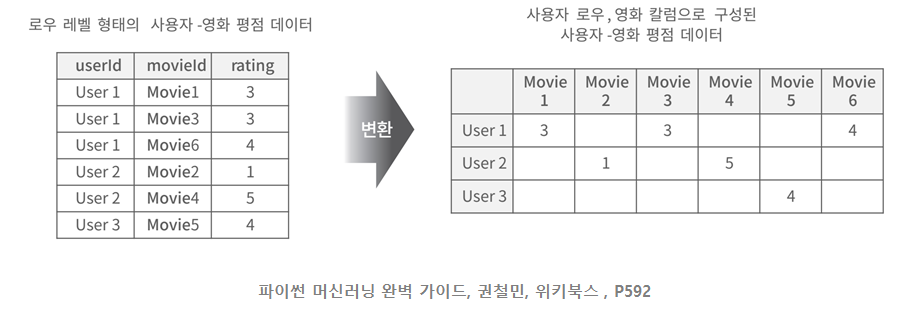

In [40]:
# 로우레벨 사용자 평점 데이터를 사용자-아이템 평점 행렬로 변환
# pivot_table() 사용
ratings = ratings[['userId', 'movieId', 'rating']]
ratings.pivot_table('rating', index='userId', columns='movieId')

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# 최소평점 확인
ratings['rating'].min()

0.5

In [45]:
# title 컬럼을 얻기 이해 movies 와 merge() 수행
# 공통 칼럼 : movieId
rating_movies = pd.merge(ratings, movies, on = 'movieId')
rating_movies.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [48]:
# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = ratings_movies.pivot_table('rating', index='userId', columns='title')

# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


#### 영화와 영화들 간 유사도 산출

- 변환된 사용자-평점 행렬 데이터 세트(ratings_matrix)를 이용해 영화 간 유사도 측정
- 코사인 유사도 기반
- 사이킷런의 cosine_similarity() 이용

주의!!
- cosine_similarity()는 행을 기준으로 서로 다른 행을 비교해 유사도 산출하는데
- 현재 rating_matrix는 userId가 기준인 행 레벨 데이터 세트로
- 영화 간 유사도가 아닌 사용자 간의 유사도가 측정됨
- 따라서 행 기준이 아닌 열(title) 기준으로 변경해야 함
--> 행과 열의 위치 변경  
- 판다스 transpose() 사용 (전치 행렬 변환)

(1) 사용자-아이템 행렬 데이터를 아이템-사용자 행렬 데이터로 변환

In [20]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

In [17]:
ratings_matrix_T.shape

(9719, 610)

(2) 아이템간의 코사인 유사도로 아이템 유사도 산출

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
item_sim = cosine_similarity(ratings_matrix_T,ratings_matrix_T)
item_sim

In [18]:
# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head()

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [20]:
# 대부와 유사도가 높은 상위 6개 영화 추출
item_sim_df["Godfather, The (1972)"].sort_values(ascending=False)[:6]

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.821773
Goodfellas (1990)                            0.664841
One Flew Over the Cuckoo's Nest (1975)       0.620536
Star Wars: Episode IV - A New Hope (1977)    0.595317
Fargo (1996)                                 0.588614
Name: Godfather, The (1972), dtype: float64

In [22]:
# 'Inception'과 유사도가 높은 상위 6개 영화 추출
# Inception 제외한 경우
item_sim_df["Inception (2010)"].sort_values(ascending=False)[:6]

# Inglourious Basterds : 바스터즈: 거친 녀석들 (전쟁/액션)
# Shutter Island : (스릴러/미스터리)
# Fight Club : (스릴러/드라마)

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

지금 생성한 아이템 기반의 영화 유사도 데이터 (item_sim_df)
- 모든 사용자의 평점을 기준으로 영화의 유사도 생성
- 유사도 기반으로 영화 추천 가능
- 그러나 개인적인 취양을 반영하지 않고
- 영화 간의 유사도만 가지고 추천하는 것

(3) 사용자가 관람(구매)하지 않은 아이템들 중에서 아이템간 유사도를 반영한 예측 점수 계산

### 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

개인화된 영화 추천의 가장 큰 특징
- 개인이 아직 관람하지 않은 영화를 추천하는 것
- 아직 관람하지 않은 영화에 대해서 
- **아이템 유사도와 기존에 관람한 영화의 평점 데이터**를 기반으로 해서
- **새롭게 모든 영화의 예측 평점**을 계산한 후 
- 높은 예측 평점을 가진 영화를 추천하는 방식

수식
- 사용자 u, 아이템 i의 개인화된 예측 평점값
- 아이템 i와 가장 유사도가 높은 Top-N개 아이템의 유사도 벡터
- RuN : 사용자 u의 아이템 i와 가장 유사도가 높은 Top-N개 아이템에 대한 실제 평점 벡터
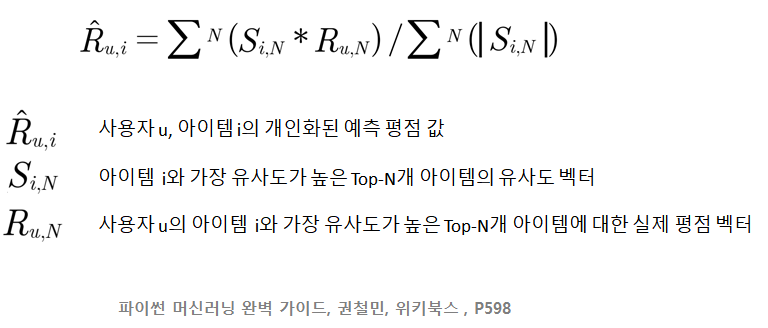

- 앞 예제에서 생성된 
- **영화 간 유사도 데이터 item_sim_df**와 
- 사용자-영화 평점 데이터프레임 변수 ratings_matirx 계속 활용해서
- 사용자별로 최적화된 평점 스코어를 예측하는 함수 생성

- 파라미터 : 사용자-영화 평점 넘파이 행렬, 영화 간 유사도 넘파이 행렬
- 반환 값 : 수식을 이용해서 개인화된 예측 평점


In [27]:
# 수식을 이용해서 개인화된 예측 평점을 구하는 함수
# 개인화된 예측 평점을 계산하고 정규화
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred


- dot() : 내적 곱 계산

In [25]:
import numpy as np

a=np.array([[3,4],
          [2,3]])
b=np.array([[4,5],
          [2,3]])


In [26]:
prod = np.dot(a,b)
print(prod)

[[20 27]
 [14 19]]


In [ ]:
# [[a,b]
#  [c,d]]
# [[A,B]
#  [C,D]]

# (aA,bC), (aB,bD)
# (cA,dC), (cB,dD)

### 1번유저의 첫번째 영화에대한 예측 평점 계산
- 1번유저가 평점을 준 영화의 평점과 1번 영화와 각 영화의 가중치를 곱하고 
- 가중치 합으로 나누어서 예측평점을 계산
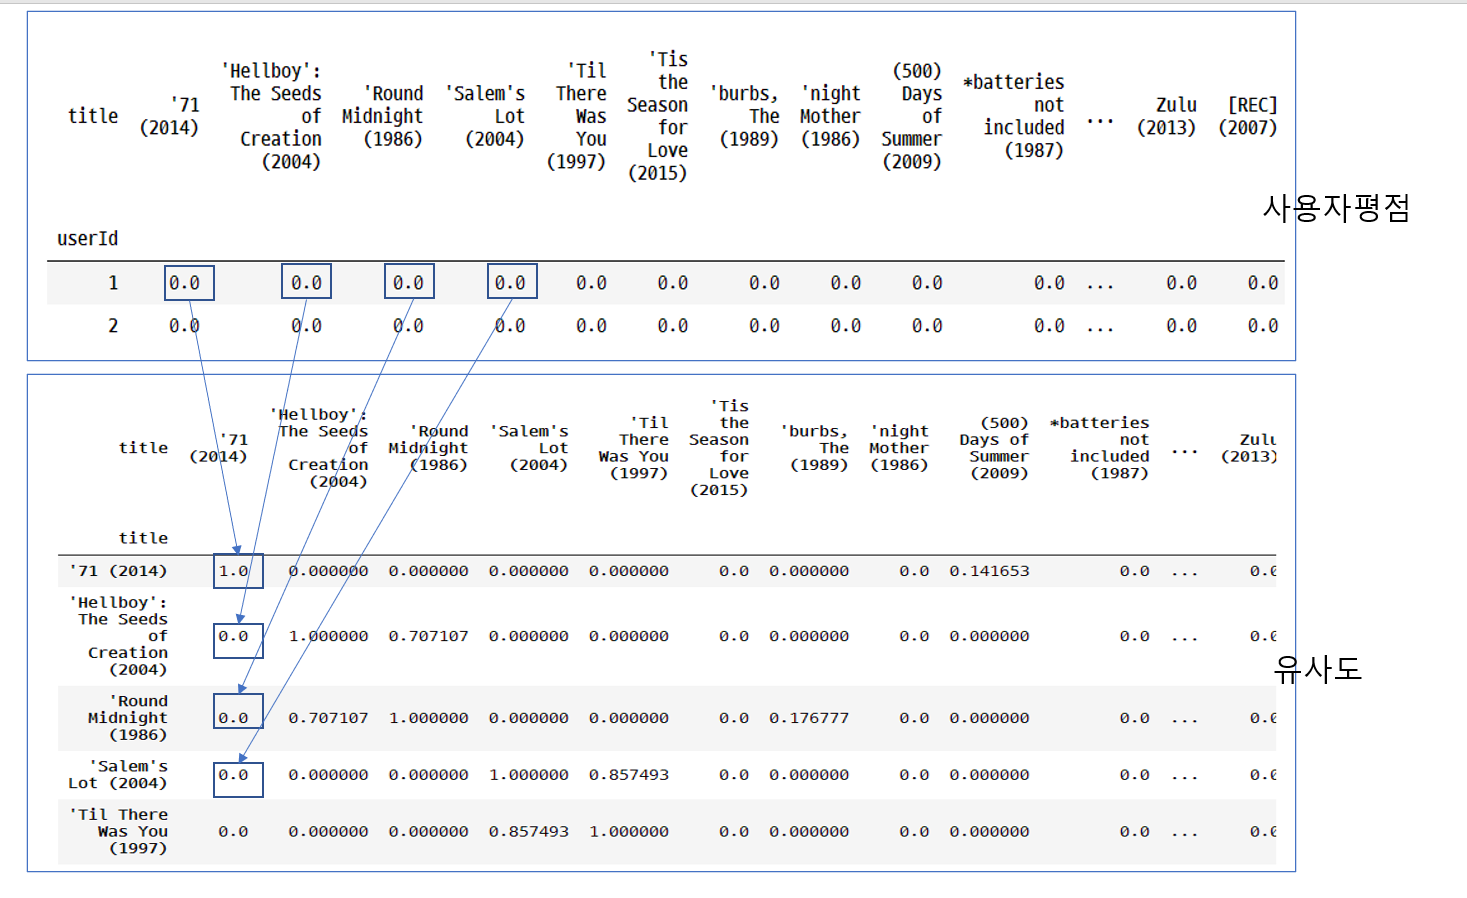

In [29]:
# 1번유저가 부여한 영화의 실제 평점
ratings_usr1 = ratings_matrix.iloc[0]

In [ ]:
item_sim_df.head(1)

In [ ]:
# '71 (2014)' 와 다른 영화들간의 유사도
sim_movie1 = itemss_sim_df.loc["'71 (2014)'"]

In [ ]:
# 1번 유저의 첫번쨰 영화에 대한 예측 평점값을 계산
((ratings_usr1 * sim_movie1), sum())/(sim_mivie1.sum())
# 이 작업을 모든유저의 모든 영화에 대하여 계산
# dot() 를 이용하면 간단하게 해결할 수 있음

In [ ]:
# 수식을 이용해서 개인화된 예측 평점을 구하는 함수
# 개인화된 예측 평점을 계산하고 정규화
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [29]:
# 실제 평점 저장 변수 : ratings_matrix
# 아이템간 유사도 저장 변수 :item_sim_df
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
print(ratings_pred_matrix.shape)
ratings_pred_matrix.head(3)

(610, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [27]:
ratings_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
item_sim_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


#### 결과
- 예측 평점이 사용자별 영화의 실제 평점과 영화의 코사인 유사도를 내적 곱(dot)한 값이기 때문에
- 기존에 영화를 관람하지 않아 0에 해당했던 실제 영화 평점이 예측에서는 값이 부여됨

- 내적 결과를 코사인 유사도 벡터 합으로 나누었기 때문에
    - 예측 평점이 실제 평점에 비해 작게 나타날 수 있음

In [30]:
ratings_pred_matrix['Toy Story (1995)']

userId
1      0.308618
2      0.026049
3      0.010823
4      0.184717
5      0.059689
         ...   
606    0.720714
607    0.218600
608    0.692652
609    0.039545
610    0.936662
Name: Toy Story (1995), Length: 610, dtype: float64

In [31]:
ratings_matrix['Toy Story (1995)']

userId
1      4.0
2      0.0
3      0.0
4      0.0
5      4.0
      ... 
606    2.5
607    4.0
608    2.5
609    3.0
610    5.0
Name: Toy Story (1995), Length: 610, dtype: float64

오차 확인
- 이 예측 결과가 원래의 실제 평점과 얼마나 차이가 있는지 확인
- 예측 평가 지표는 MSE 적용

MSE 측정 시 유의할 점!!
- 사용자가 평점을 주지 않은 경우 앞에서는 평점을 0으로 부과했지만
- 개인화된 예측 점수는 평점을 주지 않은 영화에 대해서도
- 아이템 유사도 기반해 평점 예측했음
- 따라서 실제와 예측 평점의 차이는 
- 기존에 평점이 부여된 데이터에 대해서만 오차 정도를 측정할 것임

In [32]:
# 예측 평가 지표인 MSE를 계산하는 함수 생성

from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE 를 구함. 
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()#데이터가 많으면 메모리 관리 측면에서 유리
    print(len(pred))
    print(len(actual))
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

100832
100832
아이템 기반 모든 인접 이웃 MSE:  9.895354759094706


### 각 영화와 유사도가 높은 영화에 대해서만 유사도 벡터를 적용해서 예측 수행

특정 영화와 가장 비슷한 유사도를 가지는 영화에 대해서만  
유사도 벡터를 적용하는 함수로 변경  

Top-N 유사도를 가지는 영화 유사도 벡터만 예측값을 계산하는데 적용  
- 개별 예측값을 구하기 위해 행,열 별로 for 반복 수행하면서
- Top-N 유사도 벡터를 계산해야 하기 때문에
- 수행 시간이 오래 걸림
- 데이터 크기가 커지면 매우 오래 걸리는 로직임

### 1번 유저의 1번 영화에 대한 top_n 예측 평점 계산

In [ ]:
sim_movie1 = item_sim_df.loc["'71 (2014)"]
rating_usr1 = ratings_matrix.iloc[0]

In [ ]:
top_n_index = np.argsort(sim_movie1)[::-1][:10]

In [ ]:
sim_movie1[top_n_index]
rating_usr1[top_n_index]
((sim_movie1[top_n_index] * rating_usr1[top_n_index]).sum()) / (sim_movie1[top_n_index].sum())
# 0.0 안본영화임

In [37]:
# 사용자별 아이템 유사도에 기반한 예측 평점 데이터 세트 반환하는 함수

def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape) #모든사용자에대해서 모든 영화의 평점예측을 진행

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 코드완성
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        if col==2 :
            break
        print(col)
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        print(top_n_items)
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items])) 
            print("userID  ",row+1, "의")
            print(str(col)+"번 index 영화 예측",pred[row,col])
    return pred


In [38]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)

0
[array([   0,  179, 7085, 6471, 2253, 5591, 7674, 7095, 2247, 3584, 4925,
       3565, 7537, 8267, 7676, 5111,  183, 8251, 3990,  199], dtype=int64)]
userID   1 의
0번 index 영화 예측 0.0
userID   2 의
0번 index 영화 예측 0.0
userID   3 의
0번 index 영화 예측 0.0
userID   4 의
0번 index 영화 예측 0.0
userID   5 의
0번 index 영화 예측 0.0
userID   6 의
0번 index 영화 예측 0.0
userID   7 의
0번 index 영화 예측 0.0
userID   8 의
0번 index 영화 예측 0.0
userID   9 의
0번 index 영화 예측 0.0
userID   10 의
0번 index 영화 예측 0.0
userID   11 의
0번 index 영화 예측 0.0
userID   12 의
0번 index 영화 예측 0.0
userID   13 의
0번 index 영화 예측 0.0
userID   14 의
0번 index 영화 예측 0.0
userID   15 의
0번 index 영화 예측 0.0
userID   16 의
0번 index 영화 예측 0.0
userID   17 의
0번 index 영화 예측 0.0
userID   18 의
0번 index 영화 예측 0.0
userID   19 의
0번 index 영화 예측 0.0
userID   20 의
0번 index 영화 예측 0.0
userID   21 의
0번 index 영화 예측 0.0
userID   22 의
0번 index 영화 예측 0.0
userID   23 의
0번 index 영화 예측 0.0
userID   24 의
0번 index 영화 예측 0.0
userID   25 의
0번 index 영화 예측 0.0
userID   26 의
0번 index 영화 예측 0.0

<ipython-input-37-b2659b916bb0>:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
<ipython-input-37-b2659b916bb0>:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))


 0.0
userID   29 의
1번 index 영화 예측 0.0
userID   30 의
1번 index 영화 예측 0.0
userID   31 의
1번 index 영화 예측 0.0
userID   32 의
1번 index 영화 예측 0.0
userID   33 의
1번 index 영화 예측 0.0
userID   34 의
1번 index 영화 예측 0.0
userID   35 의
1번 index 영화 예측 0.0
userID   36 의
1번 index 영화 예측 0.0
userID   37 의
1번 index 영화 예측 0.0
userID   38 의
1번 index 영화 예측 0.0
userID   39 의
1번 index 영화 예측 0.0
userID   40 의
1번 index 영화 예측 0.0
userID   41 의
1번 index 영화 예측 0.0
userID   42 의
1번 index 영화 예측 0.0
userID   43 의
1번 index 영화 예측 0.0
userID   44 의
1번 index 영화 예측 0.0
userID   45 의
1번 index 영화 예측 0.0
userID   46 의
1번 index 영화 예측 0.0
userID   47 의
1번 index 영화 예측 0.0
userID   48 의
1번 index 영화 예측 0.0
userID   49 의
1번 index 영화 예측 0.0
userID   50 의
1번 index 영화 예측 0.1330072667491781
userID   51 의
1번 index 영화 예측 0.0
userID   52 의
1번 index 영화 예측 0.0
userID   53 의
1번 index 영화 예측 0.0
userID   54 의
1번 index 영화 예측 0.0
userID   55 의
1번 index 영화 예측 0.0
userID   56 의
1번 index 영화 예측 0.0
userID   57 의
1번 index 영화 예측 0.0
userID   58 의
1번 index 

**top-n 유사도 기반의 예측 평점 및 MSE 계산**

In [39]:
# 사용자별 아이템 유사도에 기반한 예측 평점 데이터 세트 반환하는 함수(위 함수와 동일)

def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items])) 
    return pred

In [ ]:
# predict_rating_topsim() 함수를 이용해서
# - 예측 평점을 계산하고
# - 실제 평점과의 MSE 측정

import warnings
warnings.filterwarnings("ignore")

ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)

In [40]:
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


100832
100832
아이템 기반 인접 TOP-20 이웃 MSE:  3.694999233129397


In [ ]:
# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

In [ ]:
ratings_pred_matrix.head()

In [13]:
import pandas as pd
# 새롭게 예측한 사용자별 영화에 대한 예측 평점
ratings_pred_matrix = pd.read_pickle('rating.pkl')

In [14]:
ratings_pred_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.220798,0.0,0.0,1.677291,0.284372
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.220798,0.0,0.0,0.194828,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


## 특정 사용자에게 영화 추천
- 사용자가 이미 평점을 준 영화를 제외하고 추천

In [17]:
# 평점을 주지 않은 영화를 리스트 객체로 반환하는 함수 생성
# 평점을 주지 않은 영화를 관람하지 않은 영화로 간주

def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임
    user_rating = ratings_matrix.loc[userId,:]
    
    # 관람하지 않은 영화만 추출 : 평점이 0인 영화
    unseen_list = user_rating[user_rating==0].index.tolist()
    
    return unseen_list

사용자가 영화의 평점을 주지 않은 추천 대상 영화 정보와  
predict_rating_topsim() 함수에서 추출한   
사용자별 아이템 유사도에 기반한 예측 평점 데이터 세트를 이용해서  
최종적으로 사용자에게 영화 추천  

In [19]:
# 영화 추천 함수 생성

# 파라미터 : 예측 평점 데이터프레임, 
#            추천하려는 사용자 id(userId), 추천 후보 영화 리스트(해당유저가 보지않은 영화), 
#            추천 상위 영화 개수(top_n)
# 반환 : 사용자가 좋아할만한 가장 높은 예측 평점을 가진 영화 추천

def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [49]:
    
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

In [50]:
# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)
recomm_movies

title
Shrek (2001)                                                                                      0.866202
Spider-Man (2002)                                                                                 0.857854
Last Samurai, The (2003)                                                                          0.817473
Indiana Jones and the Temple of Doom (1984)                                                       0.816626
Matrix Reloaded, The (2003)                                                                       0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.765159
Gladiator (2000)                                                                                  0.740956
Matrix, The (1999)                                                                                0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003)                                     0.689591
Lord of the Rings: The Return o

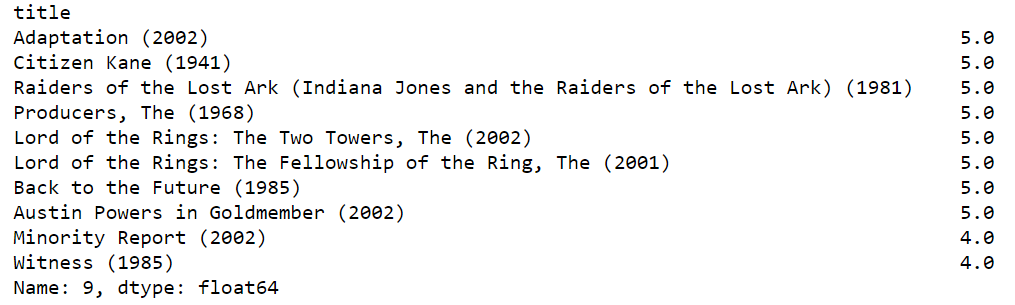